In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [33]:
df = pd.read_excel("Airlines+Data.xlsx")

In [34]:
df1 = df.copy()

In [35]:
df1

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [36]:
df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [37]:
df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [38]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [39]:
df1 = df1.set_index('Month')

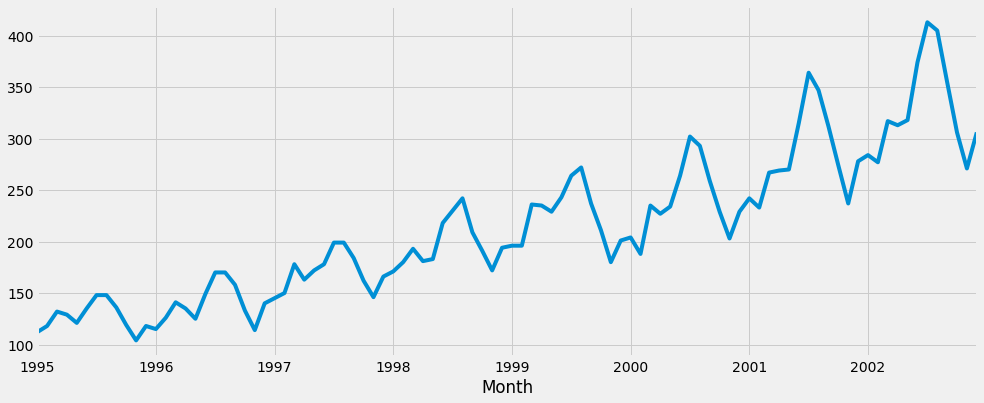

In [40]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

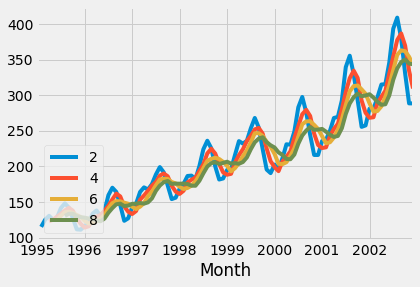

In [41]:
for i in range(2,10,2):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

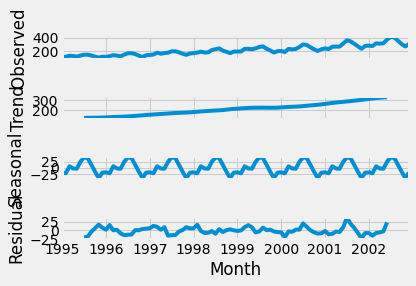

In [42]:
ts_add = seasonal_decompose(df1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

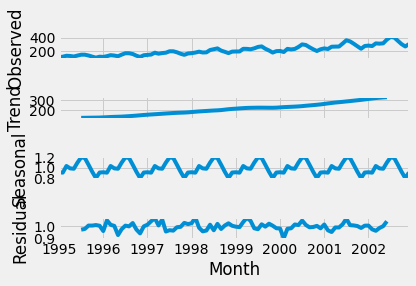

In [43]:
ts_mul = seasonal_decompose(df1.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

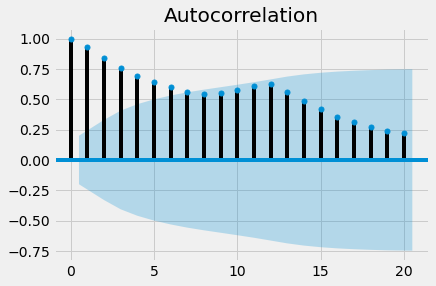

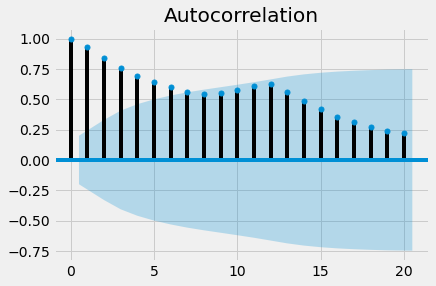

In [44]:
tsa_plots.plot_acf(df1['Passengers'])

In [45]:
#Time series forecasting with ARIMA
X = df1['Passengers'].values

In [46]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))

In [47]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Mon, 28 Feb 2022   AIC                            539.817
Time:                        15:28:35   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.241      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.501      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

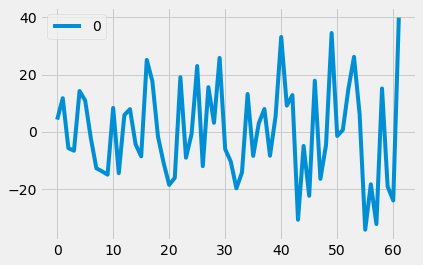

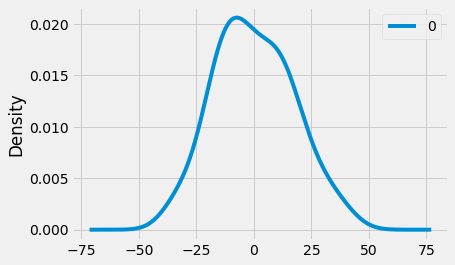

               0
count  62.000000
mean    0.057356
std    16.895802
min   -34.303296
25%   -12.610648
50%    -1.589475
75%    12.565603
max    39.955359


In [48]:
#the coefficient values used as well as the skill of the fit on the on the in-sample observations
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [58]:
#Rolling Forecast ARIMA Model
history = [x for x in train]

In [59]:
predictions = list()

In [51]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=239.755188, expected=227.000000
predicted=220.737308, expected=234.000000
predicted=237.815014, expected=264.000000
predicted=252.750566, expected=302.000000
predicted=306.715789, expected=293.000000
predicted=285.374654, expected=259.000000
predicted=250.264011, expected=229.000000
predicted=227.093116, expected=203.000000
predicted=211.011453, expected=229.000000
predicted=253.260263, expected=242.000000
predicted=252.490676, expected=233.000000
predicted=234.042128, expected=267.000000
predicted=268.773622, expected=269.000000
predicted=261.782257, expected=270.000000
predicted=271.798036, expected=315.000000
predicted=314.422099, expected=364.000000
predicted=368.637732, expected=347.000000
predicted=334.957870, expected=312.000000
predicted=301.161839, expected=274.000000
predicted=265.936474, expected=237.000000
predicted=244.037189, expected=278.000000
predicted=312.961786, expected=284.000000
predicted=291.748154, expected=277.000000
predicted=284.551868, expected=317

In [52]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 782.495


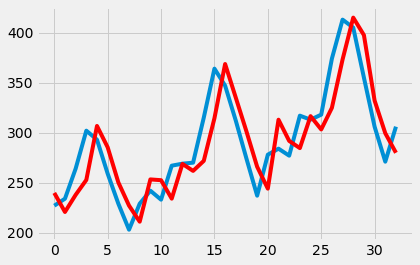

In [53]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [84]:
# Comparing Multiple Models
df2 = df.copy()
df2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [85]:
df2.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [86]:
df2 = pd.get_dummies(df2, columns = ['Month'])

In [87]:
df2.columns = ['Passengers','Month_1','Month_1','Month_1','Month_1','Month_1','Month_1','Month_1','Month_1',
               'Month_1','Month_1','Month_1','Month_1','Month_2','Month_2','Month_2','Month_2','Month_2',
               'Month_2','Month_2','Month_2','Month_2','Month_2', 'Month_3','Month_3','Month_3','Month_3',
               'Month_3','Month_3','Month_3','Month_3','Month_3','Month_3','Month_4','Month_4','Month_4',
               'Month_4','Month_4','Month_4','Month_4','Month_4','Month_4','Month_4','Month_4','Month_4',
               'Month_4','Month_4','Month_4','Month_4','Month_4','Month_4','Month_4','Month_4','Month_4',
               'Month_5','Month_5','Month_5','Month_5','Month_5','Month_5','Month_5','Month_5','Month_5',
               'Month_5','Month_5','Month_5','Month_5','Month_5','Month_5','Month_5','Month_5','Month_5',
               'Month_6','Month_6','Month_6','Month_6','Month_6','Month_6','Month_6','Month_6','Month_6',
               'Month_6','Month_6','Month_6','Month_6','Month_6','Month_6','Month_6','Month_6','Month_6',
               'Month_7','Month_7','Month_7','Month_7','Month_7','Month_8','Month_8']
df2.head()

,Passengers,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_4,Month_4,Month_4,Month_4,Month_4,Month_4,Month_4,...,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_7,Month_7,Month_7,Month_7,Month_7,Month_8,Month_8
0,112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
t= np.arange(1,97)

In [89]:
df2['t'] = t

In [90]:
df2['t_sq'] = df2['t']*df2['t']

In [91]:
log_Passengers=np.log(df2['Passengers'])

In [92]:
df2['log_Passengers']=log_Passengers

In [93]:
df2.head()

,Passengers,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_1,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_2,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_3,Month_4,Month_4,Month_4,Month_4,Month_4,Month_4,Month_4,...,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_5,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_6,Month_7,Month_7,Month_7,Month_7,Month_7,Month_8,Month_8,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,25,4.795791


In [94]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [96]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.189555144151804

In [97]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

In [99]:
additive= smf.ols('Passengers~ Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

131.09608478801175

In [100]:
addlinear= smf.ols('Passengers~ Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

131.09608478801175

In [101]:
addquad=smf.ols('Passengers~t+t_sq+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

67.87014612104434

In [108]:
mullin= smf.ols('Passengers~t+t_sq+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','t_sq','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

1.4664630159778155e+109

In [109]:
mulsea=smf.ols('Passengers~t+t_sq+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['t','t_sq','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

1.4664630159778155e+109

In [111]:
mullin= smf.ols('Passengers~t+t_sq+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','t_sq','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

1.4664630159778155e+109

In [113]:
mul_quad= smf.ols('Passengers~t+t_sq+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(pd.DataFrame(test1[['t','t_sq','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8']])))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

1.4664630159778155e+109

In [114]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [115]:
rmse=pd.DataFrame(output)

In [116]:
print(rmse)

           Model         Values
0  rmse_mul_quad  1.466463e+109
1        rmseadd   1.310961e+02
2  rmseaddlinear   1.310961e+02
3    rmseaddquad   6.787015e+01
4       rmseexpo  1.603095e+128
5        rmselin   2.550398e+01
6        rmsemul  1.466463e+109
7      rmsemulin  1.466463e+109
8       rmsequad   5.318956e+01
